In [2]:
import numpy as np
import pandas as pd

from pathlib import Path
import os
import glob

import json
import xmltodict

import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
import matplotlib.image as mpimg

In [3]:
root_data = Path("../data/VOC2012")

In [12]:
# JPEGImages
jpeg_path = root_data / "JPEGImages"
jpeg_list = glob.glob((str((jpeg_path / "*.jpg").resolve())))
jpeg_list = [jpeg.split("/")[-1] for jpeg in jpeg_list]  # remove parent path
jpeg_list = [jpeg.split(".")[0] for jpeg in jpeg_list]  # remove extension
print(f"{len(jpeg_list)} jpeg images found")

df = pd.DataFrame(
    np.array(jpeg_list).T,
    columns=("imageName",)
)
df = df.sort_values(by="imageName").reset_index(drop=True)
df.head()

17125 jpeg images found


,imageName
0,2007_000027
1,2007_000032
2,2007_000033
3,2007_000039
4,2007_000042


In [14]:
"2010_005243" in jpeg_list

True

In [5]:
# Annotations
xml_path = root_data / "Annotations"
xml_list = glob.glob((str((xml_path / "*.xml").resolve())))
xml_list = [xml.split("/")[-1] for xml in xml_list]  # remove parent path
xml_list = [xml.split(".")[0] for xml in xml_list]  # remove extension
print(f"{len(xml_list)} xml files found")

df["hasXml"] = False
df.loc[df["imageName"].isin(xml_list), "hasXml"] = True

# ImageSets/Main
# classification/detection task
main_path = root_data / "ImageSets/Main"
filename = "trainval.txt"
with open(main_path / filename) as file:
    main_list = file.readlines()
    main_list = [line.rstrip() for line in main_list]
print(f"{len(main_list)} file ids found in {filename}")

df["hasMain"] = False
df.loc[df["imageName"].isin(main_list), "hasMain"] = True

# ImageSets/Segmentation
# segmentation task
segmentation_path = root_data / "ImageSets/Segmentation"
filename = "trainval.txt"
with open(segmentation_path / filename) as file:
    segmentation_list = file.readlines()
    segmentation_list = [line.rstrip() for line in segmentation_list]
print(f"{len(segmentation_list)} file ids found in {filename}")

df["hasSegmentation"] = False
df.loc[df["imageName"].isin(segmentation_list), "hasSegmentation"] = True

# ImageSets/Action
# action task
action_path = root_data / "ImageSets/Action"
filename = "trainval.txt"
with open(action_path / filename) as file:
    action_list = file.readlines()
    action_list = [line.rstrip() for line in action_list]
print(f"{len(action_list)} file ids found in {filename}")

df["hasAction"] = False
df.loc[df["imageName"].isin(action_list), "hasAction"] = True

# ImageSets/Layout
# person layout task
layout_path = root_data / "ImageSets/Layout"
filename = "trainval.txt"
with open(layout_path / filename) as file:
    layout_list = file.readlines()
    layout_list = [line.rstrip() for line in layout_list]
print(f"{len(layout_list)} file ids found in {filename}")

df["hasLayout"] = False
df.loc[df["imageName"].isin(layout_list), "hasLayout"] = True

df.head()

17125 xml files found
11540 file ids found in trainval.txt
2913 file ids found in trainval.txt
4588 file ids found in trainval.txt
850 file ids found in trainval.txt


,imageName,hasXml,hasMain,hasSegmentation,hasAction,hasLayout
0,2007_000027,True,False,False,False,False
1,2007_000032,True,False,True,False,False
2,2007_000033,True,False,True,False,False
3,2007_000039,True,False,True,False,False
4,2007_000042,True,False,True,False,False


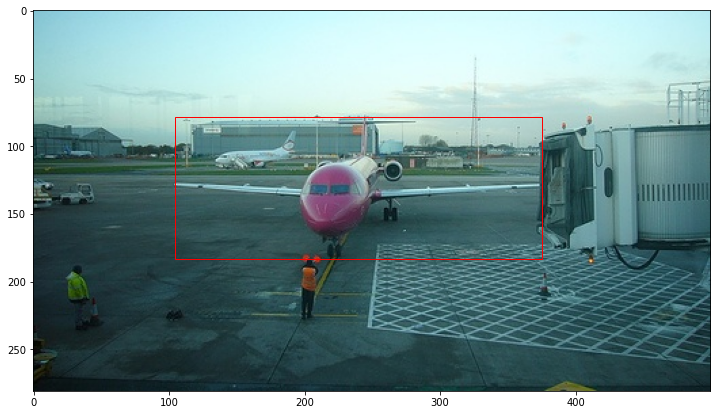

In [30]:
import matplotlib.patches as patches
import xml.etree.ElementTree as ET

tree = ET.parse(xml_path / f"{df.iloc[1].imageName}.xml")
xml_str = ET.tostring(tree.getroot(), encoding="unicode", method="xml")
xml_dict = json.loads(json.dumps(xmltodict.parse(xml_str)))
bndbox = xml_dict['annotation']['object'][0]['bndbox']
xmin, xmax = int(bndbox['xmin']), int(bndbox['xmax'])
ymin, ymax = int(bndbox['ymin']), int(bndbox['ymax'])

fig, ax = plt.subplots(figsize=(13, 7))
img = mpimg.imread(jpeg_path / f"{df.iloc[1].imageName}.jpg")
ax.imshow(img)
rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()